# PROJET 9
# PRODUIRE UNE ETUDE DE MARCHE AVEC PYTHON
-------

# MISSION : 
## EFFECTUER UNE PREMIÈRE ANALYSE D'UN GROUPEMENT DE PAYS CILBES POUR UNE EXPORTATION DE POULET
-------

# PLAN DE TRAVAIL

## I. IMPORTATION DES LIBRAIRIES
## II. IMPORTATION DES DONNÉES       
## III. CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)
## IV. L'ANALYSE EN COMPOSANTE PRINCIPALE (ACP)
## V. L'ACP pour visualiser les données
## VI. CONCLUSION

--------

##  I. IMPORTATION DES LIBRAIRIES
--------

In [1]:
#importer les packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

#importer les packages de CAH "La classification ascendante hiérarchique"
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster. hierarchy as sch



#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer Les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics


#importer les packages kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

-------
## II. IMPORTATION DES DONNÉES
------
     - Dataset etude_marche_traitement
    

#### DATASET POPULATION

In [2]:
# Importer le fichier population 
vol_pop_pib = pd.read_csv('etude_marche_traitement.csv')
vol_pop_pib.head()

,Zone,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
0,Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790
1,Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800
2,Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944
3,Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893
4,Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277


In [3]:
# Passer la colonne Zone en index
vol_pop_pib = vol_pop_pib.set_index('Zone')

----------
## III. CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)
---------

Afficher la CAH pour avoir une première analyse des clusters

In [4]:
#### Création d'un dataframe pour la partie cah

In [5]:
etude_marche_cah = vol_pop_pib

In [6]:
etude_marche_cah

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
Zone,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800
Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944
Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893
Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277
...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,147.0,14.80,11.650485,105.097087,3.780598,7.999087
Équateur,19.31,83.0,6.15,99.706745,0.000000,8.473901,4.360883
États-Unis d'Amérique,55.68,219.0,19.93,119.971532,0.673382,3.515710,4.184149


In [7]:
#extraire les valeurs numériques du dataset
X = etude_marche_cah. values
X

array([[ 1.53000000e+00,  5.00000000e+00,  5.40000000e-01, ...,
         5.08771930e+01,  1.64778892e+01,  4.86579000e+00],
       [ 3.56900000e+01,  1.43000000e+02,  1.41100000e+01, ...,
         2.42681775e+01,  7.90628024e+00,  1.77038000e+01],
       [ 1.63600000e+01,  8.50000000e+01,  6.26000000e+00, ...,
         8.08510638e+01, -1.02697372e+00,  9.76594400e+00],
       ...,
       [ 5.56800000e+01,  2.19000000e+02,  1.99300000e+01, ...,
         6.73382240e-01,  3.51570960e+00,  4.18414900e+00],
       [ 1.30000000e-01,  0.00000000e+00,  4.00000000e-02, ...,
         7.14285714e+00,  1.47453721e+01,  6.42625200e+00],
       [ 4.45000000e+00,  1.80000000e+01,  1.51000000e+00, ...,
         2.00000000e+02,  1.43825430e+01,  6.54621600e+00]])

In [8]:
# Information sur les indices
etude_marche_cah.index

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=168)

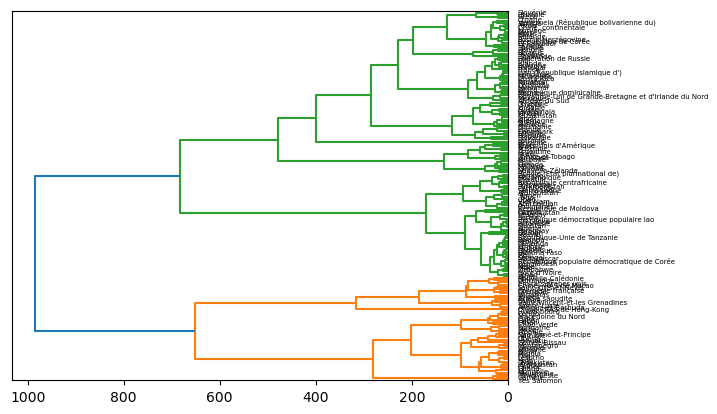

In [9]:
# generer le dendrogramme en utilisant sch 
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), labels = etude_marche_cah.index, orientation = "left")
plt.savefig('CAH_dendrogram_horizontal.jpg')

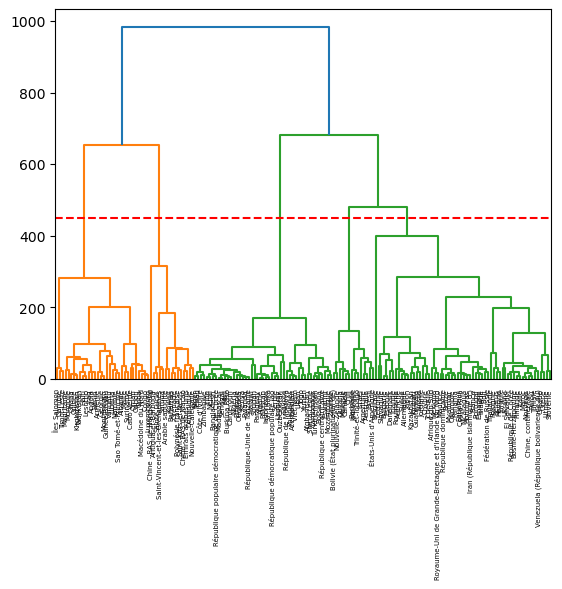

<Figure size 640x480 with 0 Axes>

In [10]:
# Regénerer le dendrogramme en dessinant la droite qui determine les clusters.
dendrogram = sch.dendrogram(sch. linkage(X, method='ward'), labels = etude_marche_cah.index)
plt.axhline (y=450, color='r', linestyle='--')
plt.show ()
plt.savefig('CAH_dendrogram_vertical.jpg')

In [11]:
# utiliser AgglomerativeClustering pour determiner le contenu des clusters.
agg_clustering = AgglomerativeClustering(n_clusters=5)

In [12]:
#appliquer L'algorithme sur mes données
agg_clustering.fit(etude_marche_cah)

AgglomerativeClustering(n_clusters=5)

In [13]:
# créer une colonne pour mettre les clusters genérés
etude_marche_cah['label'] = agg_clustering.labels_
etude_marche_cah. head ()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%),label
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790,2
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800,0
Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944,3
Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893,2
Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277,0


In [14]:
# comprendre la caracterisation des clusters
etude_marche_cah.groupby(['label']).mean()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
label,,,,,,,
0,23.051667,83.850000,8.373500,105.666089,29.933440,3.046457,7.456700
1,48.991333,183.800000,17.016667,11.266217,110.083130,5.817315,5.017452
2,5.040213,17.702128,1.696809,90.592242,12.599367,10.661470,7.502690
3,12.969687,45.187500,4.570625,21.112616,102.613305,10.341222,9.039373
4,45.509286,179.000000,15.434286,106.957361,7.549252,4.946526,8.129387


#### Ces labels de cluster peuvent nous aider à regrouper et à analyser les pays selon leurs caractéristiques et à identifier des tendances ou des patterns spécifiques au sein de chaque cluster.

In [15]:
# Boucle à travers les clusters de 0 à 5
for i in range (5):
    # Imprime le nom du cluster
    print(f'Cluster {i}')
    # Sélectionne les index du DataFrame 'etude_marche_cah' où la colonne 'label' est égale 
    # à 'i'et les imprime sous forme de liste
    print(etude_marche_cah[etude_marche_cah.label == i].index.tolist())
    # Imprime une ligne vide pour la lisibilité
    print()

Cluster 0
['Afrique du Sud', 'Allemagne', 'Autriche', 'Belgique', 'Belize', 'Bosnie-Herzégovine', 'Bulgarie', 'Bélarus', 'Chine, continentale', 'Chypre', 'Colombie', 'Costa Rica', 'Croatie', 'Danemark', 'El Salvador', 'Espagne', 'Estonie', 'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Grèce', 'Guatemala', 'Honduras', 'Hongrie', "Iran (République islamique d')", 'Irlande', 'Islande', 'Italie', 'Japon', 'Jordanie', 'Kazakhstan', 'Kiribati', 'Lettonie', 'Lituanie', 'Maroc', 'Maurice', 'Mexique', 'Myanmar', 'Nicaragua', 'Norvège', 'Panama', 'Pologne', 'Portugal', 'Pérou', 'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'République dominicaine', 'Slovaquie', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie', 'Thaïlande', 'Tunisie', 'Turquie', 'Ukraine', 'Venezuela (République bolivarienne du)', 'Équateur']

Cluster 1
['Antigua-et-Barbuda', 'Arabie saoudite', 'Bahamas', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Dominique', 'Grenade', 'Ko

In [16]:
etude_marche_cah

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%),label
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790,2
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800,0
Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944,3
Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893,2
Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277,0
...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,147.0,14.80,11.650485,105.097087,3.780598,7.999087,1
Équateur,19.31,83.0,6.15,99.706745,0.000000,8.473901,4.360883,0
États-Unis d'Amérique,55.68,219.0,19.93,119.971532,0.673382,3.515710,4.184149,4


## IV.L'ANALYSE EN COMPOSANTE PRINCIPALE (ACP)

In [17]:
# Création d'un Dataframe pour effectuer l'analyse en composante principale
etude_marche_kmeans = vol_pop_pib

In [18]:
# Centrer et reduire nos données.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(etude_marche_kmeans)
x_scaled

array([[-1.17893583, -1.14986598, -1.17443689, ...,  1.47682712,
        -0.38333614,  0.32889992],
       [ 0.9689417 ,  1.12242287,  1.23977575, ...,  0.14514007,
         1.41045432, -1.14457172],
       [-0.24647026,  0.16740292, -0.15680268, ..., -1.24273222,
         0.30133769,  1.06563574],
       ...,
       [ 2.22585247,  2.37382833,  2.27520078, ..., -0.53697994,
        -0.4785784 ,  1.80237156],
       [-1.2669636 , -1.23219528, -1.26339093, ...,  1.20766289,
        -0.16530065,  0.32889992],
       [-0.99533506, -0.93580978, -1.00186605, ...,  1.15129367,
        -0.14853868,  1.06563574]])

## APPLIQUER KMEANS

In [19]:
# déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[1344.0,
 959.8538689979607,
 728.5247588242544,
 605.1571942938809,
 508.23998807167874,
 467.4603823466836,
 422.6759647390568,
 386.8594386129769,
 357.0669650784626,
 339.5064781891788]

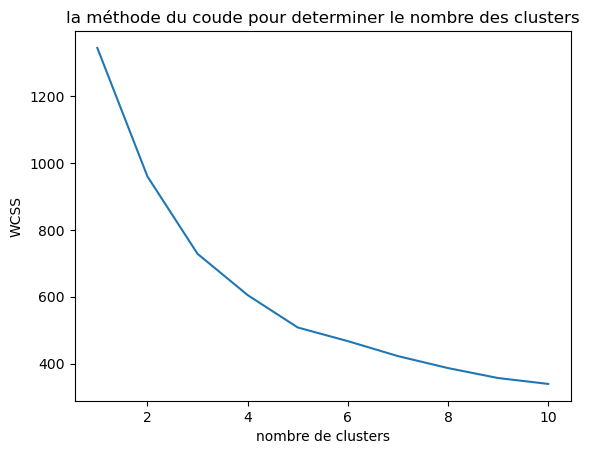

In [21]:
# Visualisation pour déterminer le nombre de clusters avec la méthode du coude
plt.plot(range (1, 11), wcss )
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.savefig('Kmeans_la méthode du coude pour determiner le nombre des clusters.jpg')
plt.show ()

In [22]:
kmeans_zone = KMeans(n_clusters = 5, init = 'k-means++')

In [23]:
# Ajustement du modèle K-Means aux données standardisées 'x_scaled'.
kmeans_zone.fit(x_scaled)

KMeans(n_clusters=5)

In [24]:
# Prédiction des clusters pour les données standardisées 'x_scaled' en utilisant le modèle K-Means.
clusters = kmeans_zone.predict(x_scaled)

In [25]:
# Ajout des prédictions de clusters à 'etude_marche_kmeans', suppression de la colonne 'label', puis affichage du DataFrame mis à jour.
etude_marche_kmeans['cluster']=clusters
etude_marche_kmeans = etude_marche_kmeans.drop("label", axis = 1)
etude_marche_kmeans

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%),cluster
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.122807,50.877193,16.477889,4.865790,2
Afrique du Sud,35.69,143.0,14.11,78.706327,24.268178,7.906280,17.703800,1
Albanie,16.36,85.0,6.26,27.659574,80.851064,-1.026974,9.765944,0
Algérie,6.38,22.0,1.97,99.277978,0.722022,10.713956,6.287893,2
Allemagne,19.47,71.0,7.96,87.061530,48.418631,2.081915,6.441277,1
...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,147.0,14.80,11.650485,105.097087,3.780598,7.999087,3
Équateur,19.31,83.0,6.15,99.706745,0.000000,8.473901,4.360883,1
États-Unis d'Amérique,55.68,219.0,19.93,119.971532,0.673382,3.515710,4.184149,4


In [26]:
# Regroupement du DataFrame 'etude_marche_kmeans' par 'cluster', calcul de la médiane pour chaque groupe, et stockage du résultat arrondi dans 'etude_marche_clusters'.
etude_marche_clusters = etude_marche_kmeans.groupby(['cluster']).median().round(2)
etude_marche_clusters

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,TAS (%),TDI (%),Croissance démographique (%),Croissance_Pib_(%)
cluster,,,,,,,
0,11.60,38.5,4.15,20.94,94.77,10.87,7.91
1,21.59,82.0,7.83,99.02,20.00,2.41,7.42
2,3.40,11.5,1.17,96.97,8.35,11.58,7.93
3,46.25,182.0,15.87,9.09,100.00,3.78,6.03
4,44.51,180.0,14.60,106.15,1.02,5.20,7.97


In [27]:
# Pour chaque cluster de 0 à 5, affiche le nom du cluster et les index associés du DataFrame 'etude_marche_kmeans'.
for i in range(5):
    print (f'Cluster {i}')
    print(etude_marche_kmeans[etude_marche_kmeans.cluster == i].index.tolist())
    print()

Cluster 0
['Albanie', 'Angola', 'Arménie', 'Bénin', 'Cabo Verde', 'Congo', 'Cuba', 'Gabon', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Iraq', 'Kirghizistan', 'Lesotho', 'Libéria', 'Luxembourg', 'Macédoine du Nord', 'Malte', 'Mauritanie', 'Mongolie', 'Monténégro', 'Namibie', 'Oman', 'Sao Tomé-et-Principe', 'Suriname', 'Tadjikistan', 'Timor-Leste', 'Vanuatu', 'Îles Salomon']

Cluster 1
['Afrique du Sud', 'Allemagne', 'Autriche', 'Belgique', 'Belize', 'Bosnie-Herzégovine', 'Bulgarie', 'Bélarus', 'Chine, continentale', 'Chypre', 'Colombie', 'Costa Rica', 'Croatie', 'Danemark', 'El Salvador', 'Espagne', 'Estonie', 'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Grèce', 'Guatemala', 'Honduras', 'Hongrie', "Iran (République islamique d')", 'Irlande', 'Islande', 'Italie', 'Japon', 'Jordanie', 'Kazakhstan', 'Kiribati', 'Lettonie', 'Lituanie', 'Maroc', 'Maurice', 'Mexique', 'Myanmar', 'Nicaragua', 'Norvège', 'Panama', 'Pologne', 'Portugal', 'Pérou', 'Roumanie', "R

## V.Utiliser I'ACP pour visualiser les données

In [28]:
# fonction pour afficher les composantes principales
def display_scree_plot (pca):
    scree = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len (scree))+1, scree.cumsum(), c="red", marker="o")
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Nombre de composantes calculées :  7


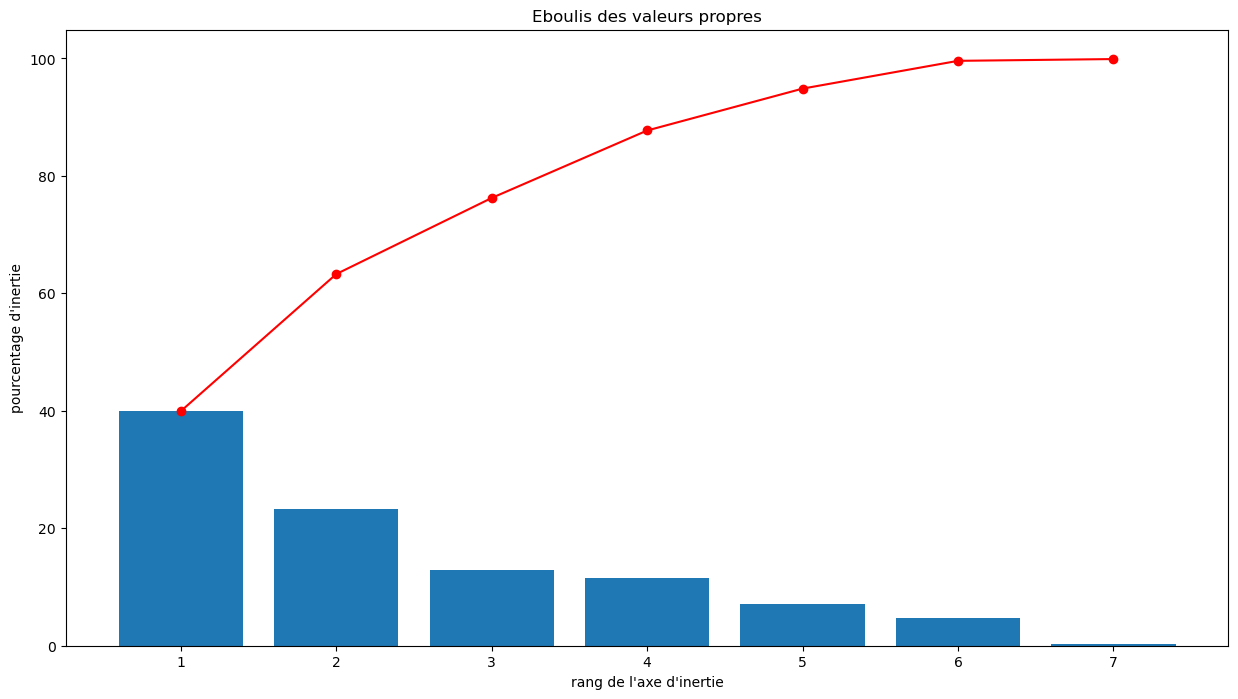

<Figure size 640x480 with 0 Axes>

In [29]:
# choix du nombre de composantes à calculer vu qu'on a sept parametres
n_comp = 7
# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(x_scaled)
print ('Nombre de composantes calculées : ', pca.n_components_)
# Eboulis des valeurs propres
plt.figure(figsize = ( 15, 8))
display_scree_plot(pca)
plt.savefig('ACP_Composantes_calculées.jpg')

##### Ce graphique vous permet de voir comment la variance totale est expliquée par chaque composante principale, et il peut vous aider à décider combien de composantes principales sont nécessaires pour représenter vos données de manière adéquate.

#### Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [30]:
# Création d'un DataFrame 'eig' contenant des détails sur les composantes principales issues de 'pca' et affichage du DataFrame.
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.216170,40.0,40.0
1,Dim2,1.877697,23.0,63.0
2,Dim3,1.043013,13.0,76.0
3,Dim4,0.924212,11.0,88.0
4,Dim5,0.574000,7.0,95.0
5,Dim6,0.380670,5.0,100.0
6,Dim7,0.024448,0.0,100.0


In [31]:
# Appliquer l'acp pour avoir 2 composants du moment que 2 composants nous permettent d'avoir 60 % de l'information.
pca = PCA(n_components=2).fit(x_scaled)
Xk_projected = pca.transform(x_scaled)

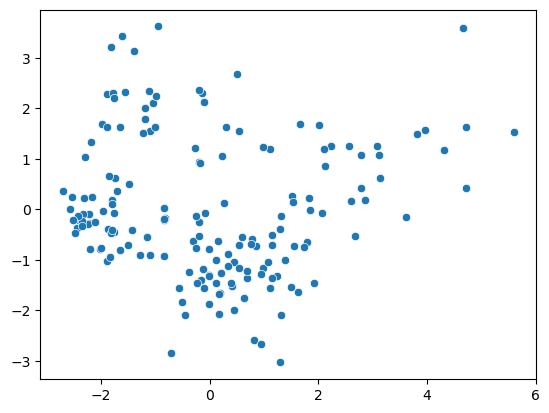

In [32]:
# dessiner les projections de x scaled sur les deux composantes qu'on a trouvé en utlisant ACP.
sns.scatterplot(data=Xk_projected, x=Xk_projected[:, 0], y=Xk_projected[:, 1], alpha=1)
plt.savefig('ACP_projection_de_x_scaled.jpg')

#### Cela nous permet de visualiser comment les pays sont distribués dans cet espace de 
#### dimension réduit défini par les deux composantes principales.

In [33]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*acp.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*acp.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [34]:
# Nous enregistrons les noms de nos pays dans une variable `names` 
names = vol_pop_pib.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=168)

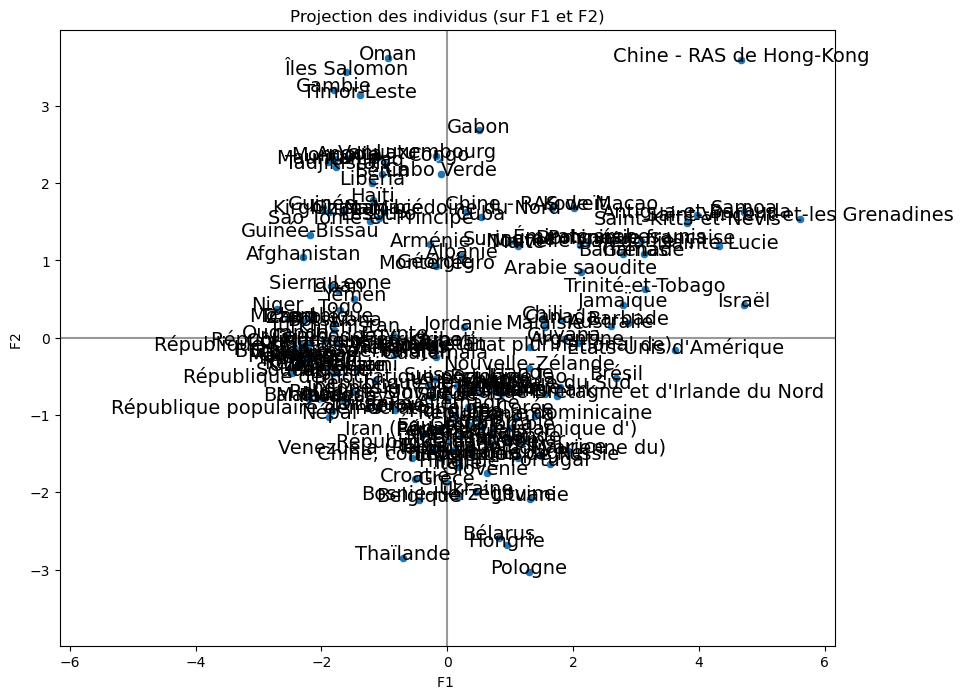

In [35]:
# Avec F1 F2 :
x_y = [0,1]
display_factorial_planes(Xk_projected, x_y,labels=names)

In [36]:
# Cette fonction dessine le cercle de correlation entre les colonnes (vous pouvez l'avoir facilement sur google)
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

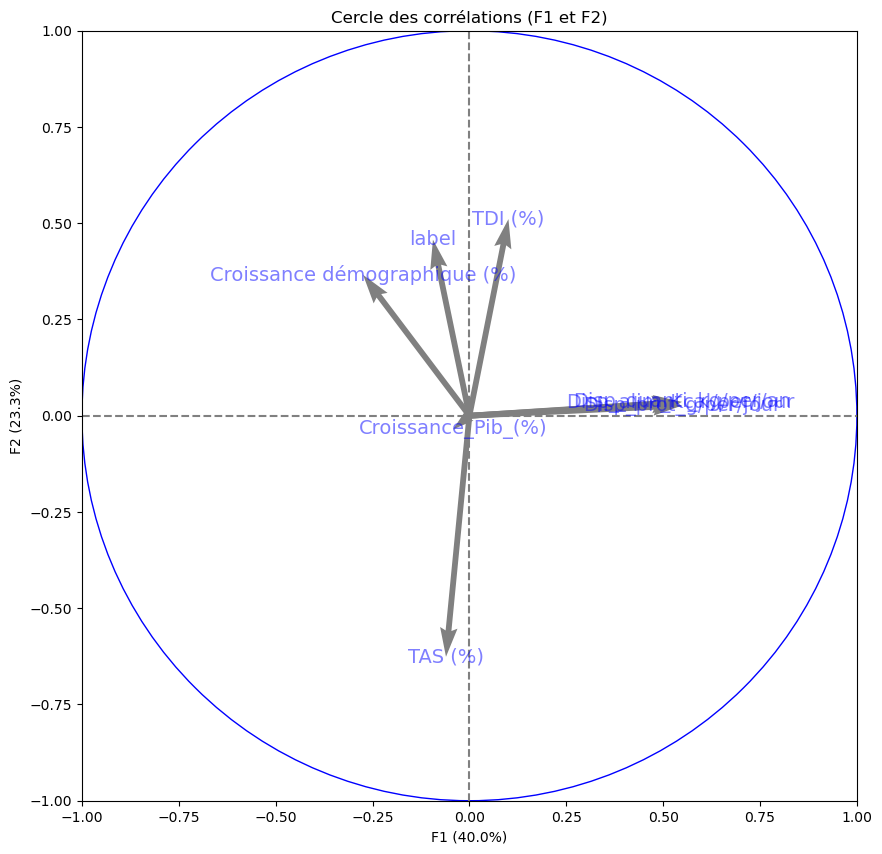

<Figure size 640x480 with 0 Axes>

In [37]:
# La fonction display_circles() permet de dessiner le cercle de correlation des deux composantes
index = vol_pop_pib.index 
features = vol_pop_pib.columns
choix_n_comp=2
pcs = pca.components_
display_circles(pcs, choix_n_comp, pca, [(0,1)], labels = np.array(features))

plt.savefig('ACP_Cercle_de_corélation.jpg')
plt.show()

Composante Principale 1 (F1) :

Les variables fortement corrélées positivement avec F1 sont :

Disp_alim_Kcal/per/jour : Cette variable indique la disponibilité alimentaire en calories 
par personne et par jour. Plus sa valeur est élevée, plus elle contribue positivement à F1.

Disp_prot_g/per/jour : Cette variable mesure la disponibilité de protéines alimentaires 
en grammes par personne et par jour. Elle est également fortement corrélée positivement avec 
F1.

Disp_quanti_kg/per/an : Cette variable représente la disponibilité alimentaire en quantité en
kilogrammes par personne et par an. Elle contribue positivement à F1.

Les variables fortement corrélées négativement avec F1 sont :

TAS (%) : Ce taux d'auto-suffisance en viande de volaille contribue négativement à F1. 
Une faible valeur de TAS signifie une forte dépendance aux importations.

TDI (%) : Ce taux de dépendance aux importations en viande de volaille contribue également
négativement à F1. Une forte valeur de TDI indique une forte dépendance aux importations.

F1 explique une grande partie de la variance totale des données.

Composante Principale 2 (F2) :

Les variables fortement corrélées positivement avec F2 sont :

Croissance_Pib_(%) : Cette variable représente la croissance du PIB en pourcentage. 
Une croissance positive du PIB contribue positivement à F2.

Croissance démographique (%) : Cette variable mesure la croissance démographique en 
pourcentage. Une croissance démographique plus élevée contribue positivement à F2.

F2 explique également une partie significative de la variance totale des données, environ 25 %.

En résumé, F1 est principalement liée à la disponibilité alimentaire en calories, en protéines
et en quantité, ainsi qu'à la dépendance aux importations en viande de volaille. F2 est liée à
la croissance économique et démographique. Ces informations peuvent nous aider à comprendre 
quelles variables sont les plus importantes pour expliquer la variance dans nos données et 
comment elles sont interconnectées.

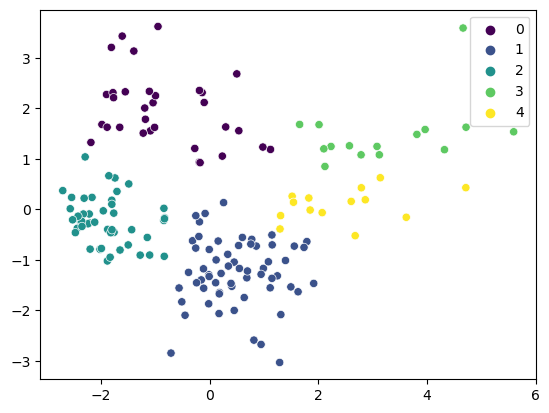

In [38]:
sns.scatterplot(data=Xk_projected, x=Xk_projected[:, 0], y=Xk_projected[:, 1], palette = 'viridis', alpha=1, hue=clusters)
plt.legend()

plt.savefig('ACP_projection_data.jpg')
plt.show()

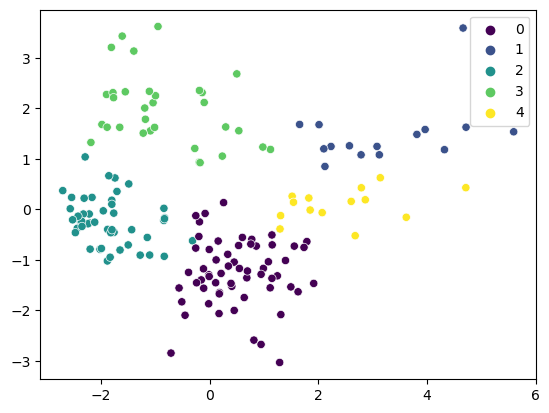

In [39]:
sns.scatterplot(data=Xk_projected, x=Xk_projected[:, 0], y=Xk_projected[:, 1], palette = 'viridis', alpha=1, hue=agg_clustering.labels_)
plt.legend()
plt.savefig('ACP_projection_data.jpg')
plt.show()

## VI.CONCLUSION

Les 2 algorithmes convergent.
Dans tous ces pays, la dépendance aux importations est forte tandis que le niveau d'auto-suffisance est bas. Les pays ayant les ressources les plus limitées tout en étant fortement dépendants des importations pourraient très bien répondre à nos besoins. 
En plus des critères que l’on a sélectionnés, Malte et le Luxembourg ont une proximité géographique (Frais de transport réduits) et se trouve dans l’espace Schengen (facilite l’échange économique).

Cette liste sera peaufinée en collaboration avec les équipes spécialisées.

